# Text Mining 20th Century Events

## Contents
    Tokenization
    Stop Words and Punctuation
    Additional Stop Words
    POS Tags with TextBlob
    Nouns
    Verbs
    Adjectives
    Counting Country Occurrences
    Sentiment Analysis

In [1]:
# Import libraries
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xe. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jboer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jboer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jboer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [2]:
# Loading 20th Century text data
myfile = open('20th_Century_Wiki_refined.txt', encoding='utf-8')

In [3]:
# Import txt file

with open('20th_Century_Wiki_refined.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [4]:
# Sentence tokenization 
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.Historic events in the 20th century[edit]World at the beginning of the century[edit]Main article: Edwardian eraThe new beginning of the 20th century marked significant changes.", 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', '1914 saw the completion of the Panama Canal.From 1914 to 1918, the First World War, and its aftermath, caused major changes in the power balance of the world, destroying or transforming some of the most powerful empires.', '"The war to end all wars": World War I (1914â€“1918)[edit]Main article: World War IArrest o

In [5]:
# Word tokenization
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today.Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'eraThe', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', 'of', 'inventions', ',', 'including', 'the', 'automobi

In [6]:
# Create frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 3272 samples and 13003 outcomes>


In [7]:
# Check top 10 most common words
top10 = dist_words.most_common(10)
print(top10)

[('the', 934), (',', 715), ('of', 443), ('.', 418), ('and', 335), ('[', 295), (']', 295), ('to', 292), ('in', 241), ('a', 170)]


In [8]:
# Create a dataframe from top 10 list
df_top10 = pd.DataFrame(top10, columns=['Word', 'Frequency'])
print(df_top10)

  Word  Frequency
0  the        934
1    ,        715
2   of        443
3    .        418
4  and        335
5    [        295
6    ]        295
7   to        292
8   in        241
9    a        170


<Figure size 1000x600 with 0 Axes>

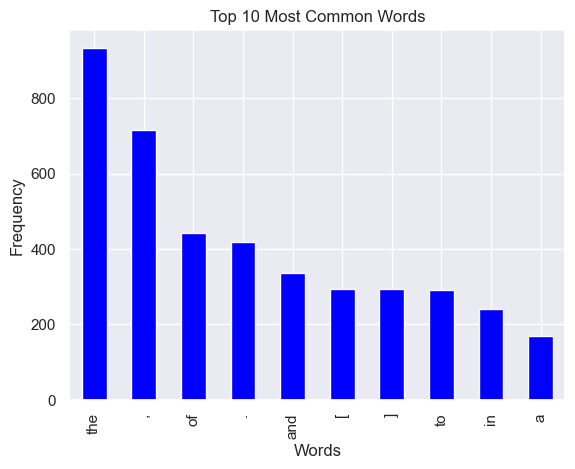

In [9]:
# Create a bar chart of 10 most common words
plt.figure(figsize=(10, 6))
df_top10.plot(kind='bar', x='Word', y='Frequency', legend=False, color='blue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Stop Words and Punctuation

In [10]:
# Defining stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'just', "that'll", 'did', 'y', 'until', 'as', "you'd", 'weren', "isn't", 'most', 'she', 'have', 'don', 'not', 'him', 'i', 'that', 'where', 'didn', "you're", 'aren', "shouldn't", 'an', 'll', 've', 'over', 'nor', 'were', 'if', 'doing', 'with', 'in', 'won', 'or', "mightn't", 'ourselves', 'such', 'hers', 'mustn', 'when', 'so', 'up', 'too', "won't", "didn't", 'been', 'between', 'out', 'm', 'does', 'more', 'those', 'again', 'itself', 'other', 'be', 'same', 'here', 'why', 'ours', 'both', 'at', 'on', 'than', 'should', 'can', 'each', 'd', "shan't", 's', 'am', 'and', 'wouldn', 'mightn', 'yourself', "hadn't", 'how', 'me', 'whom', 'these', 'has', 're', 'during', 'shan', 'theirs', 'of', 'are', 'off', "needn't", 'what', 'very', 'will', 'the', 'had', 'once', 'shouldn', "aren't", 'yours', 'which', 'wasn', 'o', 'yourselves', 'myself', 'do', 'its', 'few', 'against', "you've", 'it', 'further', "wouldn't", 'but', 'only', 'then', 'hasn', 'below', 'while', 'to', 'any', 'his', 'by', 'ma', 'all', 'into', 'co

In [11]:
# Removing stopwords in words
filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [12]:
# Check filtered_words
filtered_words

['The',
 '20th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 ',',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space-based',
 'rockets',
 ',',
 'World',
 'Wide',
 'Web',
 'created',
 '.',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 "'",
 'lives',
 'shaped',
 '21st',
 'century',
 'today.Historic',
 'events',
 '20th',
 'century',
 '[',
 'edit',
 ']',
 'World',
 'beginning',
 'century',
 '[',
 'edit',
 ']',
 'Main',
 'article',
 ':',
 'Edwardian',
 'eraThe',
 'new',
 'beginning',
 '20th',
 'century',
 'marked',
 'significant',
 'changes',
 '.',
 'The',
 '1900s',
 'saw',
 'decade',
 'herald',
 'series',
 'inventions',
 ',',
 'including',
 'automobile',
 ',',
 'airplane',
 'radio',
 'broadcasting',
 '.',
 '1914',
 'saw',
 'completion',
 'Panama',
 'Canal.From',
 '1914',
 '1918',
 ',',
 'First',
 'World',
 'War',
 ',

In [13]:
# Substitute all punctuation marks with a space 
sans_punc = re.sub("[^a-zA-Z0-9]",  # Search for all non-letters and non-digits
                          " ",          # Replace all non-letters and non-digits with spaces
                          str(filtered_words))

#### Since the wiki page I scraped deals with events in the 20th century, I thought it would be important to also keeps digits from being replaced. There could be important dates or events with numbers in their name that we may need to analyze.

In [14]:
# Check list without stop words and punctuation
sans_punc

'  The    20th    century    changed    world    unprecedented    ways         The    World    Wars    sparked    tension    countries    led    creation    atomic    bombs         Cold    War    led    Space    Race    creation    space based    rockets         World    Wide    Web    created         These    advancements    played    significant    role    citizens         lives    shaped    21st    century    today Historic    events    20th    century         edit         World    beginning    century         edit         Main    article         Edwardian    eraThe    new    beginning    20th    century    marked    significant    changes         The    1900s    saw    decade    herald    series    inventions         including    automobile         airplane    radio    broadcasting         1914    saw    completion    Panama    Canal From    1914    1918         First    World    War         aftermath         caused    major    changes    power    balance    world         destroyin

In [15]:
# Re-tokenize our new list by words
tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['The', '20th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', '21st', 'century', 'today', 'Historic', 'events', '20th', 'century', 'edit', 'World', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'eraThe', 'new', 'beginning', '20th', 'century', 'marked', 'significant', 'changes', 'The', '1900s', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', '1914', 'saw', 'completion', 'Panama', 'Canal', 'From', '1914', '1918', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'balance', 'world', 'destroying', 'transforming', 'powerful', 'empires', 'The', 'war', 'end', 'wars', 'World', '

In [16]:
# Create a new FreqDist
dist_words_filter = FreqDist(tokenized_word_2)
print(dist_words_filter)

<FreqDist with 3118 samples and 7210 outcomes>


In [17]:
# Check top 10 most common words in new list
top10_filter = dist_words_filter.most_common(10)
print(top10_filter)

[('The', 127), ('war', 79), ('War', 55), ('Soviet', 49), ('s', 47), ('Hitler', 39), ('first', 36), ('would', 35), ('World', 33), ('world', 32)]


In [18]:
# Create a dataframe from new top 10 list
df_top10_filter = pd.DataFrame(top10_filter, columns=['Word', 'Frequency'])
print(df_top10_filter)

     Word  Frequency
0     The        127
1     war         79
2     War         55
3  Soviet         49
4       s         47
5  Hitler         39
6   first         36
7   would         35
8   World         33
9   world         32


<Figure size 1000x600 with 0 Axes>

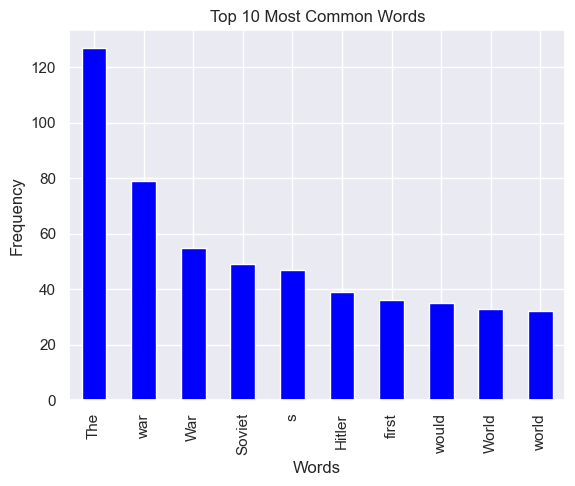

In [19]:
# Create a bar chart of 10 most common words
plt.figure(figsize=(10, 6))
df_top10_filter.plot(kind='bar', x='Word', y='Frequency', legend=False, color='blue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Additional Stop Words

In [20]:
# Removing additional stop words
new_stopwords = ['The', 's', 'In', 'I', 'It', 'And', 'edit', 'would']

filtered_words_2 = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered_words_2.append(word)
print(filtered_words_2)

['20th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', '21st', 'century', 'today', 'Historic', 'events', '20th', 'century', 'World', 'beginning', 'century', 'Main', 'article', 'Edwardian', 'eraThe', 'new', 'beginning', '20th', 'century', 'marked', 'significant', 'changes', '1900s', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', '1914', 'saw', 'completion', 'Panama', 'Canal', 'From', '1914', '1918', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'balance', 'world', 'destroying', 'transforming', 'powerful', 'empires', 'war', 'end', 'wars', 'World', 'War', '1914', '1918', 'Main', 'article', 'Wo

In [21]:
# Create a new FreqDist
dist_words_filter_2 = FreqDist(filtered_words_2)
print(dist_words_filter_2)

<FreqDist with 3111 samples and 6932 outcomes>


In [22]:
# Check top 10 most common words in new filtered list
top10_filter_2 = dist_words_filter_2.most_common(10)
print(top10_filter_2)

[('war', 79), ('War', 55), ('Soviet', 49), ('Hitler', 39), ('first', 36), ('World', 33), ('world', 32), ('Germany', 32), ('German', 31), ('Japanese', 31)]


In [23]:
# Create a dataframe from new top 10 list
df_top10_filter_2 = pd.DataFrame(top10_filter_2, columns=['Word', 'Frequency'])
print(df_top10_filter_2)

       Word  Frequency
0       war         79
1       War         55
2    Soviet         49
3    Hitler         39
4     first         36
5     World         33
6     world         32
7   Germany         32
8    German         31
9  Japanese         31


<Figure size 1000x600 with 0 Axes>

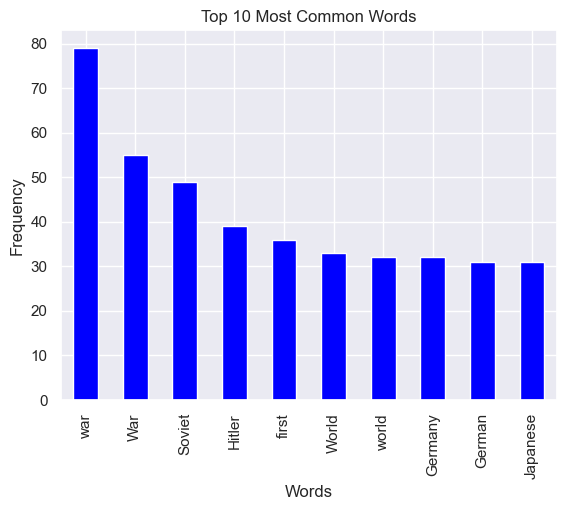

In [24]:
# Create a bar chart of 10 most common words
plt.figure(figsize=(10, 6))
df_top10_filter_2.plot(kind='bar', x='Word', y='Frequency', legend=False, color='blue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

#### Without the stop words and punctuation, we get to see the actual words that are used most frequently in the 20th Century Events wiki page. This is far more representative of the content than the first frequency bar chart. The only issue is that "war" and "world" show up twice on the list, once with the first letter lowercase and once with the first letter uppercase. So, really the frequencies of "war" and "War" should be combined as well as "world" and "World". To do this I will convert all words to lowercase, except specific words like "US" (United States) so it doesn't get counted as the word "us".

In [25]:
# Defining special cases list to preserve their original case
special_cases = ['US']
# Convert words to lowercase based on conditions
processed_words = [word if word in special_cases else word.lower() for word in filtered_words_2]

In [26]:
# Create a FreqDist of processed words
dist_words_processed = FreqDist(processed_words)
print(dist_words_processed)

<FreqDist with 2952 samples and 6932 outcomes>


In [27]:
# Check top 10 most common words in processed words list
top10_processed = dist_words_processed.most_common(10)
print(top10_processed)

[('war', 134), ('world', 65), ('soviet', 49), ('first', 39), ('hitler', 39), ('new', 33), ('germany', 32), ('german', 31), ('japanese', 31), ('states', 29)]


In [28]:
# Create a dataframe from processed top 10 list
df_top10_processed = pd.DataFrame(top10_processed, columns=['Word', 'Frequency'])
print(df_top10_processed)

       Word  Frequency
0       war        134
1     world         65
2    soviet         49
3     first         39
4    hitler         39
5       new         33
6   germany         32
7    german         31
8  japanese         31
9    states         29


<Figure size 1000x600 with 0 Axes>

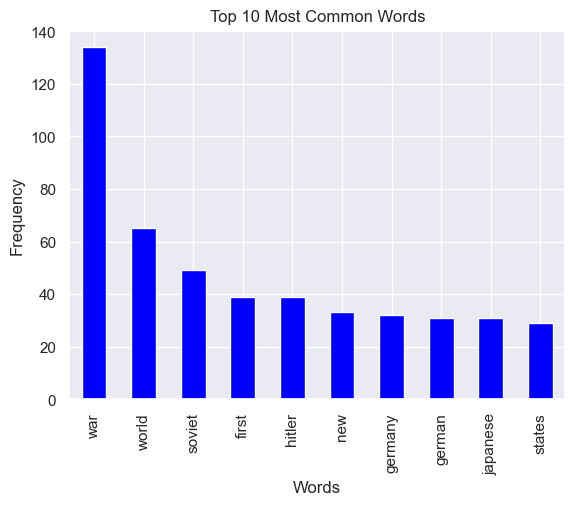

In [29]:
# Create a bar chart of 10 most common words in processed list
plt.figure(figsize=(10, 6))
df_top10_processed.plot(kind='bar', x='Word', y='Frequency', legend=False, color='blue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Save figure
plt.savefig('10_most_common_words.png')

plt.show()

#### Now we have an accurate representation of the frequency of words in the wiki page, regardless of their capitalization. One insight we can already see from this bar chart is that there was a lot of war in the 20th century.

## POS Tags with TextBlob

In [30]:
# Check time it will take to create TextBlob text
%time
text = TextBlob(str(filtered_words_2))

CPU times: total: 0 ns
Wall time: 0 ns


In [31]:
# Checking TextBlob text
text

TextBlob("['20th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', '21st', 'century', 'today', 'Historic', 'events', '20th', 'century', 'World', 'beginning', 'century', 'Main', 'article', 'Edwardian', 'eraThe', 'new', 'beginning', '20th', 'century', 'marked', 'significant', 'changes', '1900s', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', '1914', 'saw', 'completion', 'Panama', 'Canal', 'From', '1914', '1918', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'balance', 'world', 'destroying', 'transforming', 'powerful', 'empires', 'war', 'end', 'wars', 'World', 'War', '1914', '1918', 'Main', 'art

In [32]:
# Adding tags to the list
tags_list = text.tags

In [33]:
# Reviewing tags_list
tags_list

[('[', 'JJ'),
 ("'20th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'changed", 'VBD'),
 ("'world", 'NNP'),
 ("'", 'POS'),
 ("'unprecedented", 'VBD'),
 ("'ways", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wars", 'NNS'),
 ("'", 'POS'),
 ("'sparked", 'VBD'),
 ("'tension", 'NNP'),
 ("'", 'POS'),
 ("'countries", 'NNS'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'creation", 'NNP'),
 ("'", 'POS'),
 ("'atomic", 'NNP'),
 ("'", 'POS'),
 ("'War", 'NNP'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'Space", 'NNP'),
 ("'", 'POS'),
 ("'Race", 'NNP'),
 ("'", 'POS'),
 ("'creation", 'NN'),
 ("'space", 'NNP'),
 ("'", 'POS'),
 ("'based", 'VBD'),
 ("'rockets", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wide", 'NNP'),
 ("'", 'POS'),
 ("'Web", 'NNP'),
 ("'", 'POS'),
 ("'created", 'VBD'),
 ("'These", 'JJ'),
 ("'advancements", 'NNS'),
 ("'", 'POS'),
 ("'significant", 'NNP'),
 ("'", 'POS'),
 ("'role", 'NNP'),
 ("'", 'POS'),
 ("'citizens", 'NNS'),
 ("'", 'POS'),
 ("'l

In [34]:
# Create a dataframe of the words and their types
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [35]:
# Checking dataframe
df_text.head()

,Words,Word type
0,[,JJ
1,'20th,NNP
2,',POS
3,'century,NNP
4,',POS


In [36]:
# Grouping dataframe by word type to get counts
df_t = df_text.groupby('Word type').count().reset_index()

In [37]:
# Checking grouped dataframe
df_t.head()

,Word type,Words
0,CC,1
1,CD,117
2,DT,10
3,EX,8
4,FW,29


In [38]:
# Finding top 10 POS tags
pos_top10 = df_t.nlargest(10, 'Words')

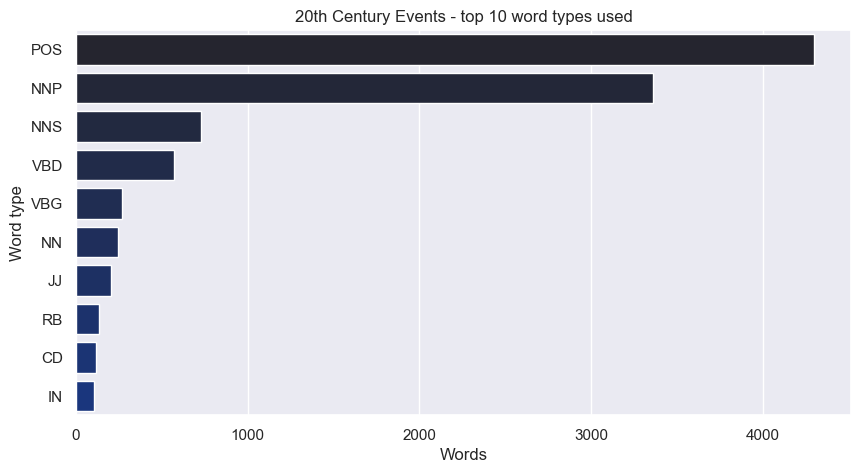

In [39]:
# Plotting bar chart for top 10 POS tags
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = pos_top10).set_title("20th Century Events - top 10 word types used")

# Save figure
plt.savefig('top_10_word_types.png')

#### The most used word type is POS, which stands for words with possessive endings. This makes sense as the context of the wiki page would explain how a certain country's or person's influence affected an event in the 20th century. However, I didn't expect it to be the highest. Next, is NNP (proper nouns). This is the one that I thought would be the highest since this text is talking about countries, people, and names of events that occurred. NNS (plural nouns) and VBD (past tense verbs) are next on the list but not closely behind.

## Nouns

In [40]:
# Creating df of nouns and their occurrences then finding top 15
df_nouns = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP") | (df_text['Word type'] == "NNPS")]
df_nouns.columns = ["Word", "Occurrences"]
x = df_nouns.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15_nouns = y.nlargest(15, 'Occurrences')

In [41]:
# Checking top15_nouns list
top15_nouns

,Word,Occurrences
1927,'war,79
836,'War,55
774,'Soviet,49
533,'Hitler,39
1247,'first,36
851,'World,33
1951,'world,32
501,'German,31
502,'Germans,29
822,'Union,28


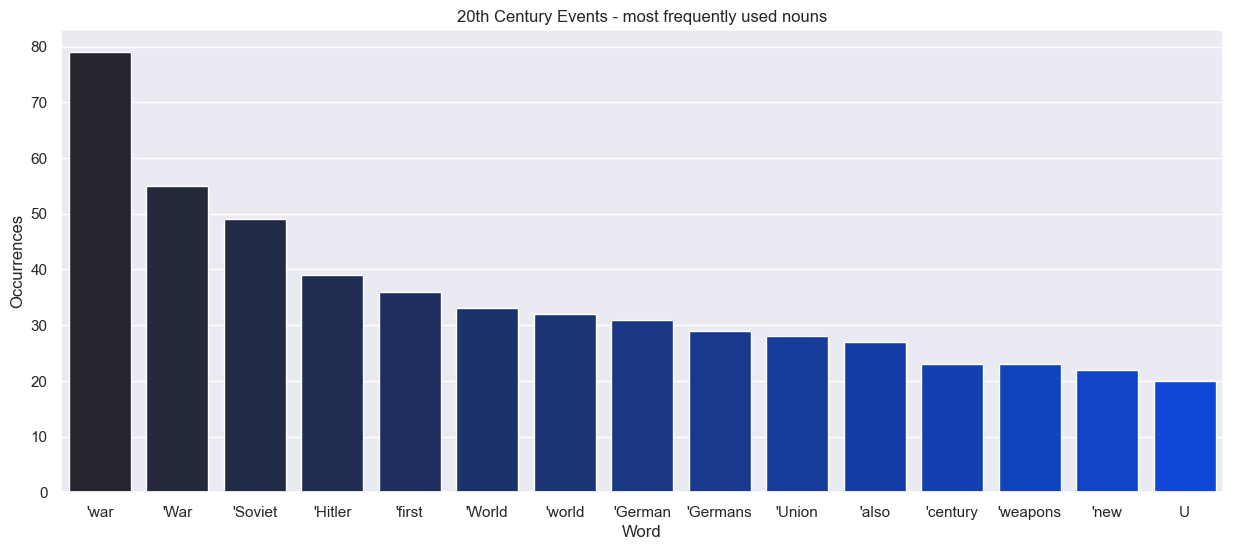

In [42]:
# Plotting a bar chart of the most frequently used nouns
plt.figure(figsize=(15, 6))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurrences",
    saturation=0.9, data = top15_nouns).set_title("20th Century Events - most frequently used nouns")

# Save figure
plt.savefig('most_frequent_nouns.png')

#### Since we are analyzing the part of speech, I couldn't change the case of the words as it would affect the recognition of the correct part of speech (proper noun or noun), which is why there is "war" and "War" as well as "world" and "World". The "U" likely stands for US or USA but was separated from the other letters when I removed the punctuation. Aside from that, based on these frequencies, we can get an idea of things that happened and key players in 20th century events. For example, we can clearly see that "war" was big part of the 20th century and that there were a lot of "first"s that happened, whether that be in relation to the "wars" or possibly "new" "weapons", and that these events affected the entire "world". This chart also shows the key players in the events of the 20th century, "Soviet" "Union", "Hitler", "German(s)", "US". 

## Verbs

In [43]:
# Creating df of verbs and their occurrences then finding top 15
df_verbs = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD") | (df_text['Word type'] == "VBG") | (df_text['Word type'] == "VBN")]
df_verbs.columns = ["Word", "Occurrences"]
x = df_verbs.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15_verbs = y.nlargest(15, 'Occurrences')

In [44]:
# Checking top15_verbs list
top15_verbs

,Word,Occurrences
14,'United,26
0,'Allied,18
264,'led,15
452,'used,13
260,'launched,11
228,'including,9
200,'forced,8
102,'controlled,8
442,'turned,7
425,'surrendered,7


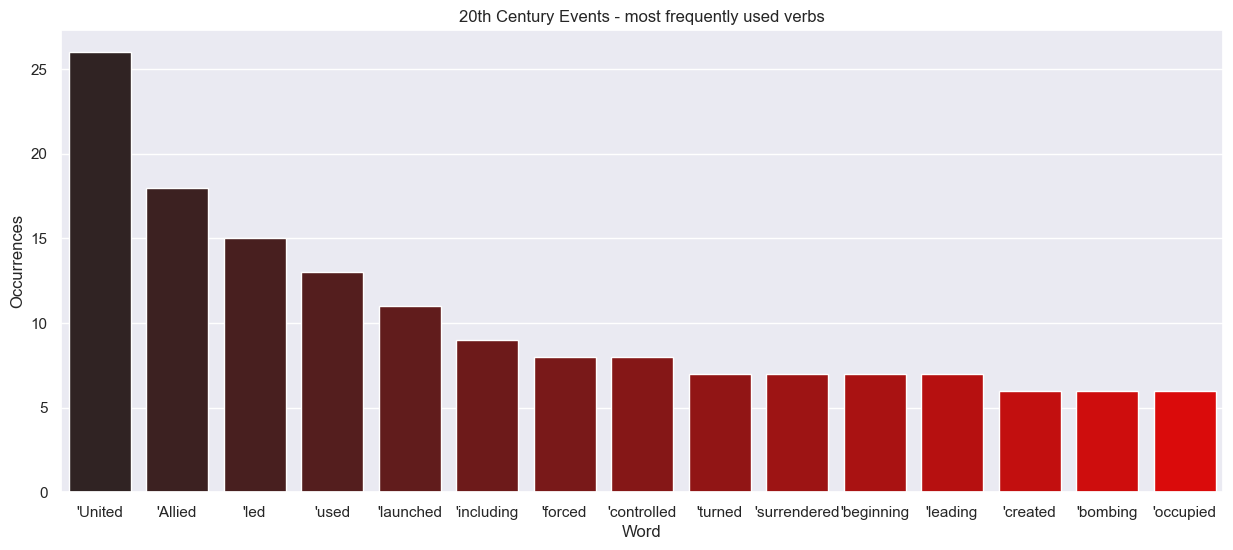

In [45]:
# Plotting a bar chart of the most frequently used verbs
plt.figure(figsize=(15, 6))
with sns.dark_palette("xkcd:red", 15):
    sns.barplot(x="Word", y="Occurrences",
    saturation=0.9, data = top15_verbs).set_title("20th Century Events - most frequently used verbs")

# Save figure
plt.savefig('most_frequent_verbs.png')

#### Looking at the most frequently used verbs I think there is a little confusion with "United" and "Allied". While the words themselves can be past tense verbs, in the context they are being used they would be considered adjectives or even part of a proper noun "United States", "Allied Nations". Apart from that, the rest of the most frequently used verbs are words associated with war, "led", "launched", "forced", "controlled", "surrendered", "bombing". This again tells us that the 20th century was filled with conflict.

## Adjectives

In [46]:
# Creating df of adjectives and their occurrences then finding top 15
df_adj = df_text[(df_text['Word type'] == "JJ") | (df_text['Word type'] == "JJR") | (df_text['Word type'] == "JJS")]
df_adj.columns = ["Word", "Occurrences"]
x = df_adj.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurrences'], ascending=False)
top15_adj = y.nlargest(15, 'Occurrences')

In [47]:
# Checking top15_adj list
top15_adj

,Word,Occurrences
20,'Japanese,31
2,'American,16
36,'West,9
95,'power,8
12,'Chinese,7
76,'largest,7
94,'possible,5
93,'political,5
28,'Russian,5
81,'medical,4


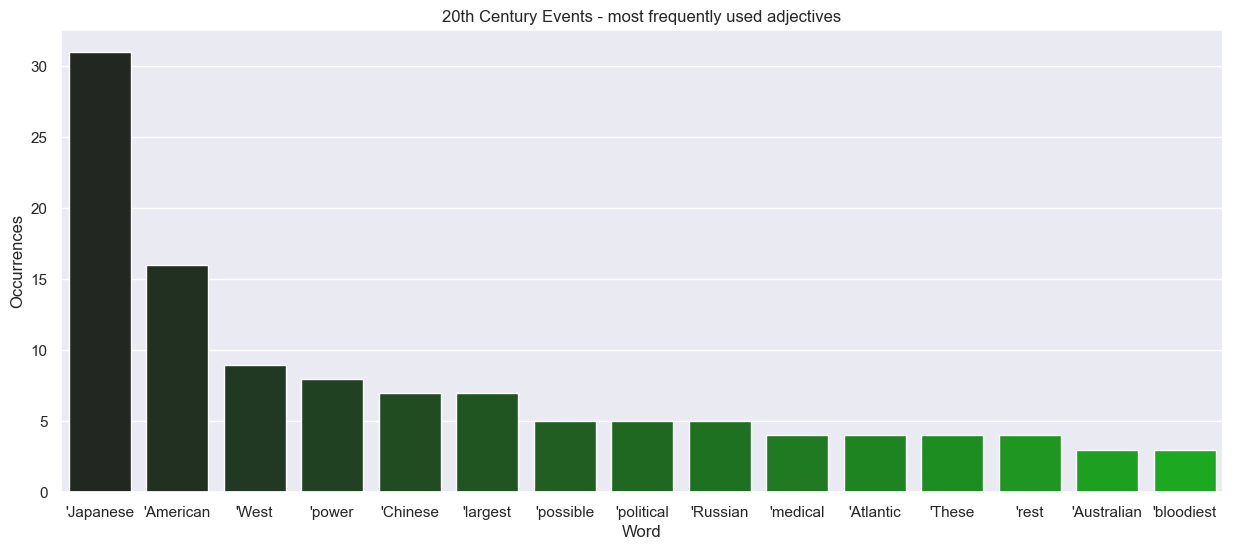

In [48]:
# Plotting a bar chart of the most frequently used adjectives
plt.figure(figsize=(15, 6))
with sns.dark_palette("xkcd:green", 15):
    sns.barplot(x="Word", y="Occurrences",
    saturation=0.9, data = top15_adj).set_title("20th Century Events - most frequently used adjectives")

# Save figure
plt.savefig('most_frequent_adjs.png')

#### Here we are given a look at more key players in the 20th century, i.e. "Japanese", "American", "Chinese", "Russian", "Australian". These most frequent adjectives can also give us an idea of the potential reasonsa and results behind some of the conflicts and wars that we discovered earlier. For example, "power", "political", "medical", "bloodiest". Aside from the actual names of the countries, the terms "

## Counting Country Occurrences

In [49]:
# Create a single string of text
listToStr = ' '.join([str(elem) for elem in filtered_words_2])
print(listToStr)

20th century changed world unprecedented ways World Wars sparked tension countries led creation atomic bombs Cold War led Space Race creation space based rockets World Wide Web created These advancements played significant role citizens lives shaped 21st century today Historic events 20th century World beginning century Main article Edwardian eraThe new beginning 20th century marked significant changes 1900s saw decade herald series inventions including automobile airplane radio broadcasting 1914 saw completion Panama Canal From 1914 1918 First World War aftermath caused major changes power balance world destroying transforming powerful empires war end wars World War 1914 1918 Main article World War IArrest suspect Sarajevo following Assassination Archduke Franz FerdinandThe First World War simply WWI termed Great War contemporaries started July 1914 ended November 1918 war precipitated Assassination Sarajevo Austro Hungarian Empire heir throne Erzherzog Franz Ferdinand Gavrilo Princip

In [50]:
# Create a count for the countries
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [51]:
# Checking counts list
print(all_counts)

Counter({'war': 79, 'War': 55, 'Soviet': 49, 'Hitler': 39, 'first': 36, 'World': 33, 'world': 32, 'Germany': 32, 'German': 31, 'Japanese': 31, 'Germans': 29, 'Union': 28, 'became': 28, 'also': 27, 'United': 26, 'Japan': 26, 'century': 23, 'Europe': 23, 'weapons': 23, 'nuclear': 23, 'new': 22, 'States': 21, 'U': 20, 'attack': 20, 'end': 19, 'Allies': 19, 'British': 19, 'many': 19, 'Allied': 18, 'could': 18, 'This': 18, 'countries': 17, 'Main': 17, 'two': 17, 'forces': 17, 'However': 17, 'one': 17, 'Jews': 17, 'later': 17, 'American': 16, 'II': 16, 'Stalin': 16, 'S': 16, 'led': 15, 'computer': 15, 'article': 14, 'July': 14, 'known': 14, 'France': 14, 'nations': 14, 'people': 14, '1945': 14, 'North': 14, 'South': 13, 'used': 13, 'began': 13, 'battle': 13, 'invasion': 13, 'Cold': 12, 'power': 12, 'troops': 12, 'came': 12, 'economic': 12, 'time': 12, 'made': 12, 'early': 12, 'Poland': 12, 'Berlin': 12, 'Africa': 12, 'On': 12, 'space': 11, 'major': 11, 'government': 11, 'New': 11, 'Britain':

In [52]:
# Importing countries list csv
path = r'C:\Users\jboer\20th-Century\countries_list_20th_century_1.5.csv'
country = pd.read_csv(path, index_col = 0)

In [53]:
# Checking dataframe
country.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [54]:
# Converting country dataframe to list
country_list = country['country_name'].to_list()

In [55]:
# Mapping variations of country names
country_var = {
    "United States": ['United States', 'US', 'USA', 'America', 'American', 'Americans', 'States', 'U'],
    "Germany": ['Germany', 'Germans', 'German'],
    "United Kingdom": ['United Kingdom', 'Britain', 'Kingdom', 'England', 'British'],
    "Australia": ['Australia', 'Australians'],
    "Japan": ['Japan', 'Japanese'],
    "China, People's Republic of": ['China', 'Chinese'],
    "Korea, North": ['Korea', 'Korean', 'Koreans'],
    "Korea, South": ['Korea', 'Korean', 'Koreans'],
    "France": ['France', 'French'],
    "Vietnam": ['Vietnam', 'Vietnamese'],
    "Russia": ['Russia', 'Russian', 'Russians', 'USSR', 'Soviet'],
    "Czech Republic": ['Czech Republic', 'Czechoslovakia', 'Czech'],
    "Hungary": ['Hungary', 'Hungarian', 'Hungarians'],
    "Finland": ['Finland', 'Finnish'],
    "Sweden": ['Sweden', 'Swedish']
}

In [56]:
# Initialize dictionary to store the counts for each country
country_counts = {country: 0 for country in country_list}

# Count the occurrences of each country variation
for word, count in all_counts.items():
    for country, variations in country_var.items():
        if word in variations:
            country_counts[country] += count
            break
print(country_counts)

{'Afghanistan': 0, 'Albania': 0, 'Algeria': 0, 'Andorra': 0, 'Angola': 0, 'Antigua and Barbuda': 0, 'Argentina': 0, 'Armenia': 0, 'Australia': 2, 'Austria': 0, 'Azerbaijan': 0, 'Bahamas, The': 0, 'Bahrain': 0, 'Bangladesh': 0, 'Barbados': 0, 'Belarus': 0, 'Belgium': 0, 'Belize': 0, 'Benin': 0, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 0, 'Botswana': 0, 'Brazil': 0, 'Brunei': 0, 'Bulgaria': 0, 'Burkina Faso': 0, 'Burundi': 0, 'Cambodia': 0, 'Cameroon': 0, 'Canada': 0, 'Cape Verde': 0, 'Central African Republic': 0, 'Chad': 0, 'Chile': 0, "China, People's Republic of": 16, 'Colombia': 0, 'Comoros': 0, 'Congo, Democratic Republic of the': 0, 'Congo, Republic of the': 0, 'Costa Rica': 0, 'Croatia': 0, 'Cuba': 0, 'Cyprus': 0, 'Czech Republic': 6, 'Denmark': 0, 'Djibouti': 0, 'Dominica': 0, 'Dominican Republic': 0, 'East Timor': 0, 'Ecuador': 0, 'Egypt': 0, 'El Salvador': 0, 'Equatorial Guinea': 0, 'Eritrea': 0, 'Estonia': 0, 'Eswatini': 0, 'Ethiopia': 0, 'Fiji': 0, 'Finland': 4, 

In [57]:
# Search for the names from the list in the dictionary
dct = {v:[k] for v,k in country_counts.items()}  
df = pd.DataFrame(dct)

In [58]:
# Checking dataframe
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Transposing dataframe and resetting index
df = df.transpose().reset_index()

In [60]:
# Checking data types of dataframe
df.dtypes

index    object
0         int64
dtype: object

In [61]:
# Re-checking dataframe
df.head()

,index,0
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Andorra,0
4,Angola,0


In [62]:
# Renaming columns
df.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [63]:
# Checking results of columns name changes
df.head()

,Country,Times mentioned
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Andorra,0
4,Angola,0


In [64]:
# Checking shape of dataframe
df.shape

(208, 2)

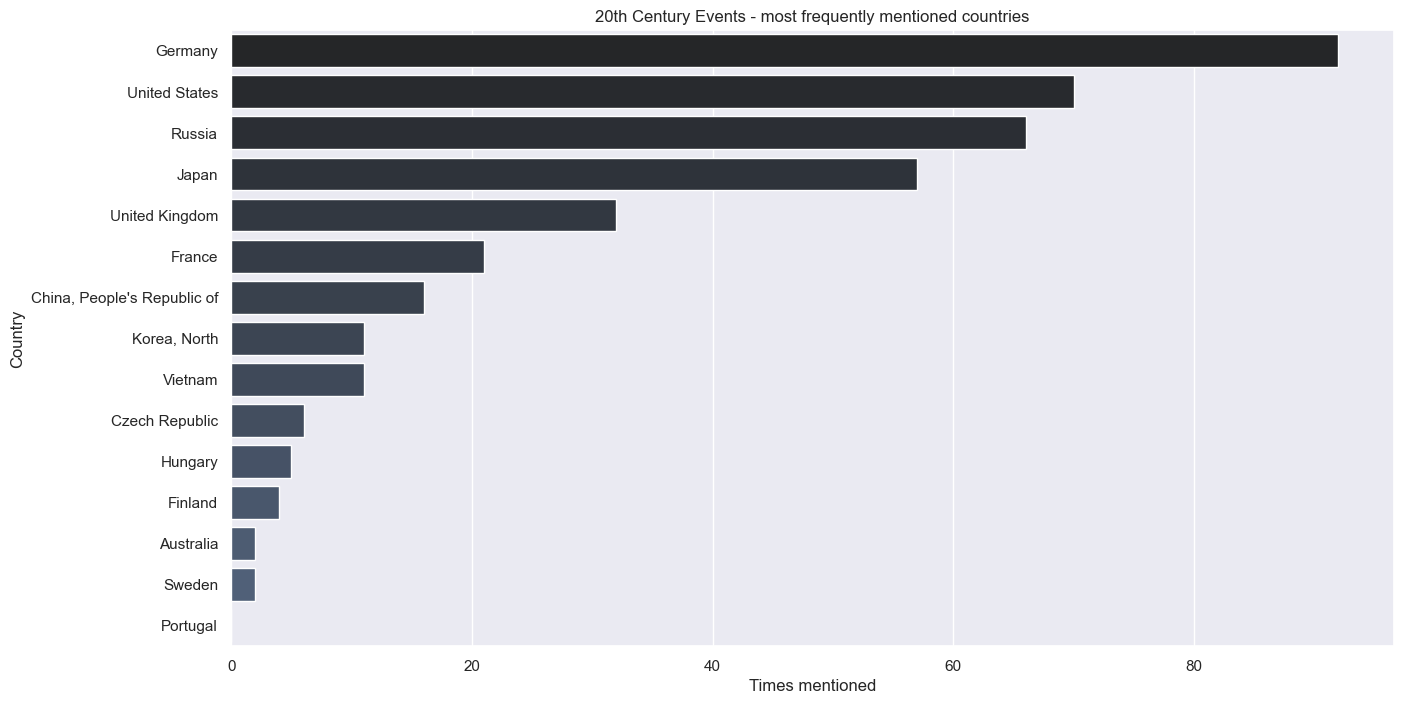

In [65]:
# Creating bar plot of top 15 most frequently mentioned countries

# Filtering dataframe to include only the top 15 countries
top_15_countries = df.sort_values("Times mentioned", ascending=False).head(15)

# Creating plot
plt.figure(figsize=(15, 8))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country",
    saturation=0.9, data = top_15_countries).set_title("20th Century Events - most frequently mentioned countries")

# Save figure
plt.savefig('most_frequent_countries.png')

plt.show()

#### In this plot (including the counts of all countries and their variations) we can see that Germany was mentioned the most followed by United States and Russia. Even knowing a bit of history about the 20th century, this makes sense since Germany and the United States were the biggest superpowers of that time. However, I would have expected the United States to be the country that was most mentioned. Another note is about the count of North Korea. Since the text was counted by each individual word, there wasn't a way to distinguish bewtween North Korea and South Korea so all counts of Korea were counted under North Korea even though some of them may have actually been South Korea.

## Sentiment Analysis

#### My expectations of a sentiment analysis of this text is the polarity will be closer to a -1 meaning it will have a more negative sentiment since a lot of the events included war and conflict. I also believe the subjectivity will be close to 0 since these are factual, historical events rather than fiction.

In [66]:
# Conducting sentiment analysis
text_sent = TextBlob(str(filtered_words_2))

In [67]:
# Showing results
print(text_sent.sentiment)

Sentiment(polarity=0.04206656483509329, subjectivity=0.3511612599716787)


#### The results of the sentiment analysis show that the polarity is 0.04 which is higher than I expected. This shows that it has a more nuetral tone. After seeing this it makes sense since it is just recounting the events as facts so it doesn't really have a negative or positive tone. The subjectivity is 0.35 which is closer to 0 (still higher than I thought it would be) so it does indicate that the text is more factual than fictitous.